## Exploratory data analysis of the Irish weather

I have performed an exploratory data analysis (EDA) of historic weather data from Met Eireann, Ireland's main meteorological service.



In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import DataFrame
import seaborn as sns


In [9]:

weather_data = pd.read_csv('Weather.csv', skiprows=[0,1,2,3,4,5,6,7,8,9])
weather_data=weather_data.rename(columns=weather_data.iloc[0]).drop(weather_data.index[0])
weather_data.head()


,day,month,year,station,maxtp,mintp,rain,wdsp,hg,sun
1,1,jan,2021,Dublin Airport,5,-1.9,0,8.8,19,6.6
2,2,jan,2021,Dublin Airport,3.5,-2.4,0.1,10.1,19,2.4
3,3,jan,2021,Dublin Airport,3.9,-2.5,4.1,9.2,30,0.6
4,4,jan,2021,Dublin Airport,5.3,2.2,0.5,11.5,27,0.6
5,5,jan,2021,Dublin Airport,5.2,1.2,1,9.5,25,1


In [10]:
weather_data.describe()

,day,month,year,station,maxtp,mintp,rain,wdsp,hg,sun
count,1095,1095,1095,1095,1093,1093,1091,1094,1092,1093
unique,31,12,1,3,232,201,160,170,47,146
top,19,oct,2021,Dublin Airport,11.1,6.6,0,6.5,19,0
freq,36,93,1095,365,15,16,395,29,66,152


* The Irish Weather dataset contains 1095 observations of 10 variables
* The dataset contains the weather data for only one year, 2021.
* The temporal resolution is 24 hours or 1 Day
* The  following weather measurements have been used:
    * ***maxtp*** - Maximum Air Temperature in degree Celcius
    * ***mintp*** - Minimum Air Temperature in degree Celcius
    * ***rain***  - Precipitation Rate in milimetres(mm)
    * ***wdsp***  - Mean Windspeed in Knots
    * ***hg***    - Highest Gust in Knots
    * ***sun***   - Sunshine Duration in Hours

### Missing Values

In [11]:
weather_data.isna().sum()

day        0
month      0
year       0
station    0
maxtp      2
mintp      2
rain       4
wdsp       1
hg         3
sun        2
dtype: int64


* The number of missing values in each column is as follows:
 * day - none
 * month - none 
 * year - none
 * station - none
 * maxtp - 2
 * mintp - 2
 * rain - 4
 * wdsp - 1
 * hg - 3
 * sun - 2

* A variety of inaccuracies can occur when analyzing weather data. For a range of factors, the data could have missing values, such as measurement flaw, equipment failure, data handling,etc.

* ***Delete the missing value row:***<br>
    If a row has several columns with missing data, simply remove the row. However, only datasets with millions of records can use this. The benefit is that even if we delete these entries from the enormous dataset, the performance and output would remain the same. This is not applicable to our dataset and has drawbacks due to the limited dataset size and the fact that a single row's columns don't typically contain a large number of missing values. As a result, this approach should not be taken into account. 
* ***Using statistical methods such as Mean, Mode or median:***<br>
    We use methods already studied such as replacing the data with mean or mode or the median of the available values. This works in certain cases while they make not take into account the correlation of the data.
* ***Deep learning models to estimate our features:***<br>
    These methods are quite accurate when dealing with real life data.

* ***However, in our case, statistical methods are the best approach.***

In [245]:
no_of_unique_stations = len(weather_data.station.value_counts())
print(no_of_unique_stations)

3


In [246]:
print(weather_data[weather_data['mintp']==min(weather_data['mintp'])])

  day month  year         station  maxtp  mintp  rain  wdsp    hg  sun  \
9   9   jan  2021  Dublin Airport    2.4   -5.9   0.0   6.5  19.0  6.8   

   Temp_range  
9         8.3  


In [247]:
print(weather_data[weather_data['rain']==max(weather_data['rain'])])

     day month  year       station  maxtp  mintp  rain  wdsp    hg  sun  \
1030  27   oct  2021  Cork Airport   14.7   12.4  50.1  16.4  36.0  0.0   

      Temp_range  
1030         2.3  


 * We have **3** different weather stations in our dataset.<br>
 * The minimum temperature of **-5.9** degrees Celcius was recorded on **09 January 2021** at the **Dublin Airport** .<br>
 * The maximum temperature of **29.6** degrees Celcius was recorded on **22 July 2021** at the **Shannon Airport** .

In [250]:
weather_data = weather_data.astype({'mintp': 'float64', 'maxtp': 'float64', 'rain': 'float64','wdsp': 'float64',
                                    'hg': 'float64', 'sun':'float64'})

***Numerical summary (mean, standard deviation, minimum, maximum, etc.) for each of the weather measurements***

In [257]:
weather_data[['maxtp','mintp','rain','wdsp','hg','sun']].describe()

,maxtp,mintp,rain,wdsp,hg,sun
count,1093.000000,1093.000000,1091.000000,1094.000000,1092.000000,1093.000000
mean,13.732662,6.950046,2.596242,8.587020,22.863553,4.036780
std,5.107554,4.687423,4.864790,3.705469,8.396710,3.958998
min,0.600000,-5.900000,0.000000,1.900000,7.000000,0.000000
25%,10.200000,3.400000,0.000000,6.000000,17.000000,0.300000
50%,13.400000,7.100000,0.300000,7.900000,21.000000,2.900000
75%,17.600000,10.700000,3.050000,10.600000,28.000000,6.600000
max,29.600000,18.700000,50.100000,26.300000,64.000000,15.200000


  * ***Maximum Temperatures***
* 75% of maximum temperatures are within 17.6 degree Celcius.
* Range from 0.60 to 29.6 degree Celcius.
* Standard Deviation of 5.107
* Mean of max temperatures is 13.7 degree Celcius

  * ***Minimum Temperatures***
* 75% of maximum temperatures are within 10.7 degree Celcius.
* Range from -5.90 to 18.7 degree Celcius.
* Standard Deviation of 4.687
* Mean of min temperatures is 6.78 degree Celcius

  * ***Precipitation***
* Mean rainfall of around 2.6 mm
* Range from 0 to 50.10 mm
* Standard Deviation of 4.867

  * ***Mean Windspeeds***
* Mean wdsp of around 8.58 Knots
* Range from 1.9 to 26.3 Knots
* Standard Deviation of 3.705

  * ***Highest Gust Speeds***
* Mean  of around 22.86 Knots
* Range from 7 to 64 Knots
* Standard Deviation of 8.40
 
  * ***Sunshine Hour***
* Mean  of around 4.036 hours
* Range from 0 to 15.2 hours
* Standard Deviation of 3.958

***Graphical summary for each of the weather measurements***

Text(0, 0.5, 'Degree Celcius')

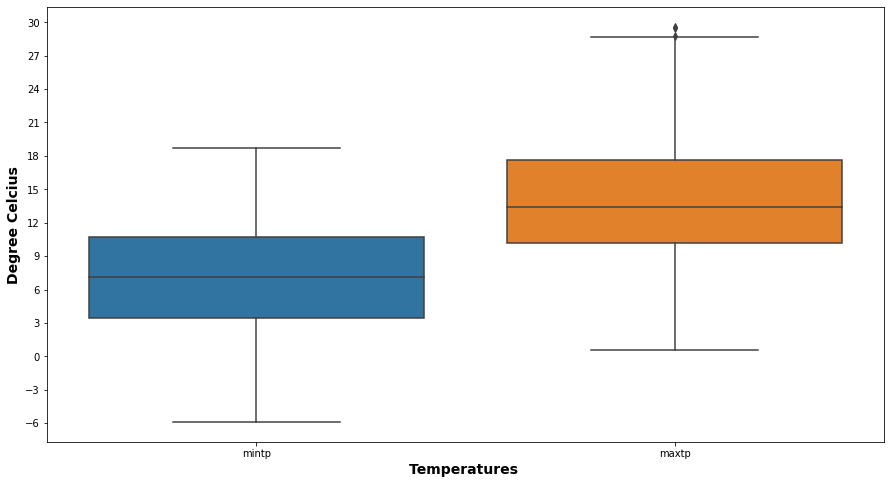

In [242]:
plt.figure(figsize=(15,8))
sns.boxplot(data=weather_data[['mintp','maxtp']])
plt.yticks(np.linspace(-6,30,13))
plt.xlabel('Temperatures ',fontsize=14,fontweight="bold")
plt.ylabel("Degree Celcius",fontsize=14,fontweight="bold")




Text(0, 0.5, 'mm')

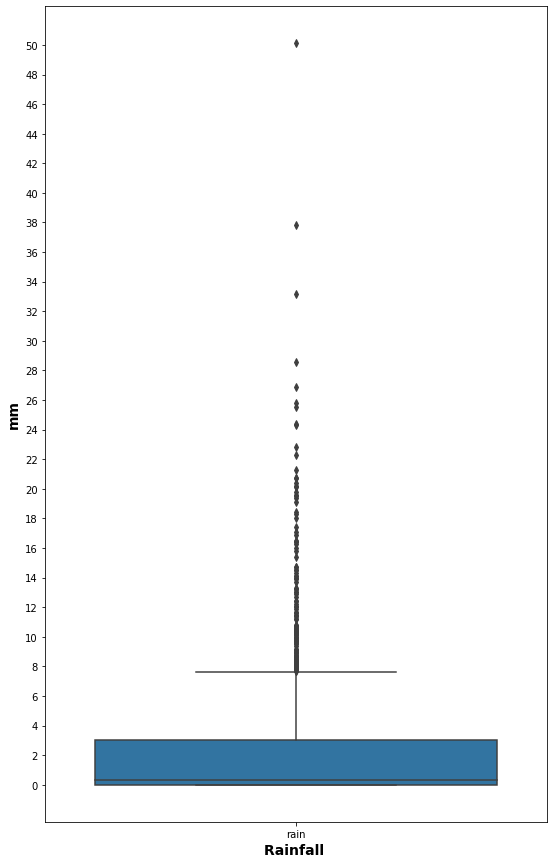

In [241]:
plt.figure(figsize=(9,15
                   ))
sns.boxplot(data=weather_data[['rain']])
plt.yticks(np.linspace(0,50,26))
plt.xlabel('Rainfall ',fontsize=14,fontweight="bold")
plt.ylabel("mm",fontsize=14,fontweight="bold")



Text(0, 0.5, 'Knots')

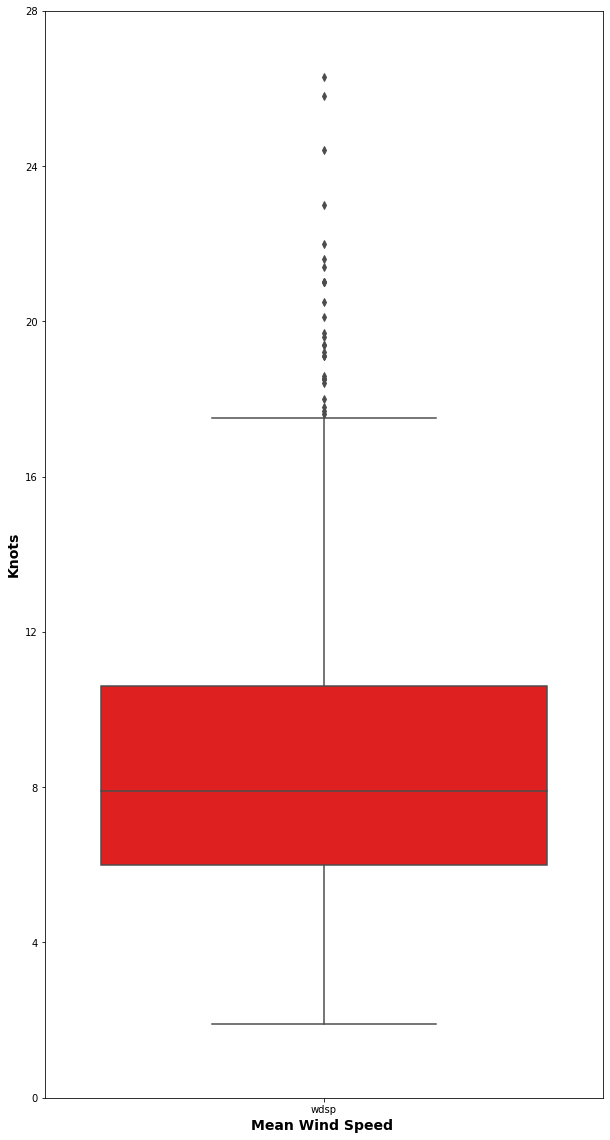

In [240]:
plt.figure(figsize=(10,20))
sns.boxplot(data=weather_data[['wdsp']], color="red")
plt.yticks(np.linspace(0,28,8))
plt.xlabel('Mean Wind Speed ',fontsize=14,fontweight="bold")
plt.ylabel("Knots",fontsize=14,fontweight="bold")




Text(0, 0.5, 'Knots')

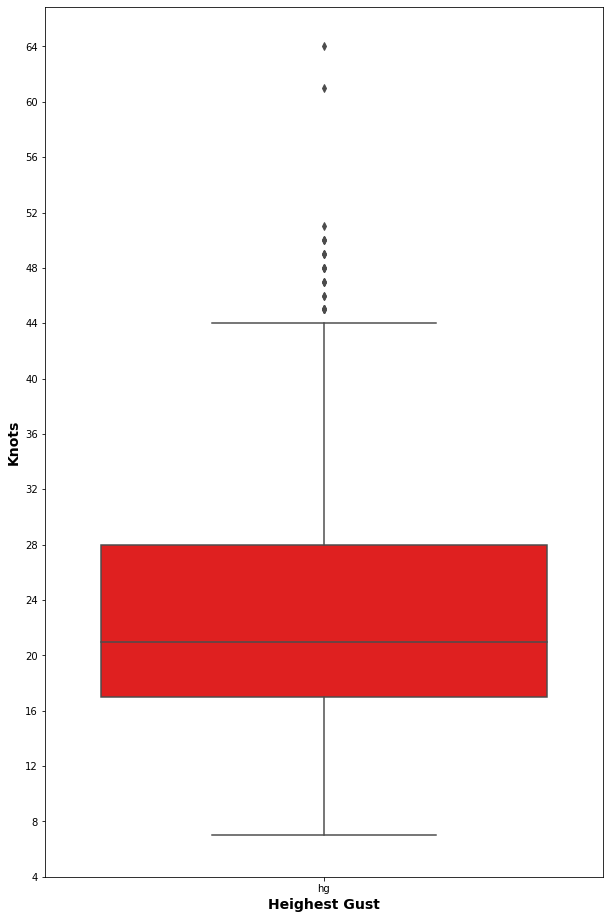

In [238]:
plt.figure(figsize=(10,16))
sns.boxplot(data=weather_data[['hg']],color="red")
plt.yticks(np.linspace(4,64,16))
plt.xlabel('Heighest Gust',fontsize=14,fontweight="bold")
plt.ylabel("Knots",fontsize=14,fontweight="bold")




Text(0, 0.5, 'Duration in hours')

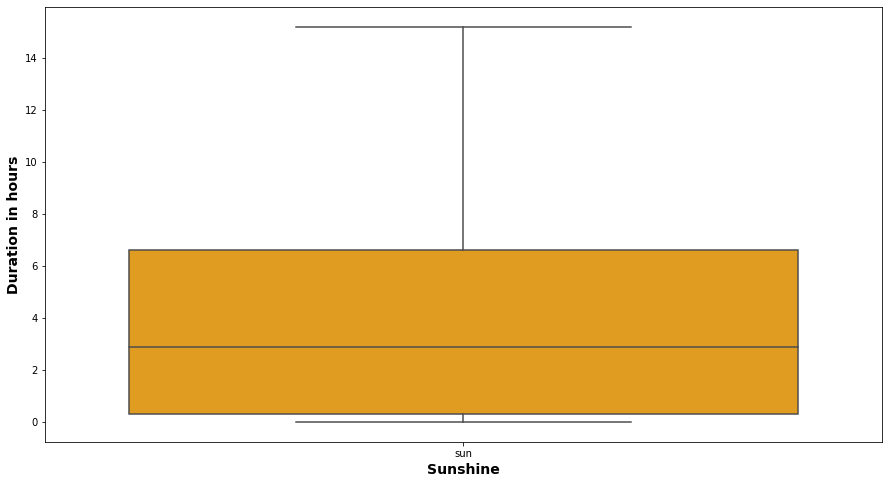

In [239]:
plt.figure(figsize=(15,8))
sns.boxplot(data=weather_data[['sun']], color = "orange")
plt.xlabel('Sunshine',fontsize=14,fontweight="bold")
plt.ylabel("Duration in hours",fontsize=14,fontweight="bold")

* From the plots, our summary statistics are corroborated. 
* In addition, we can notice that ***Wind Speed***, ***Highest Gust*** and ***Precipiation*** data has the maximum outliers.
* The ***mintp*** and ***maxtp*** data are almost normally distributed.

***Scatter plot of the maximum temperature versus the minimum temperature***

Text(8.536753472222223, 0.5, 'Minimum Temperature(C)')

<Figure size 1800x1800 with 0 Axes>

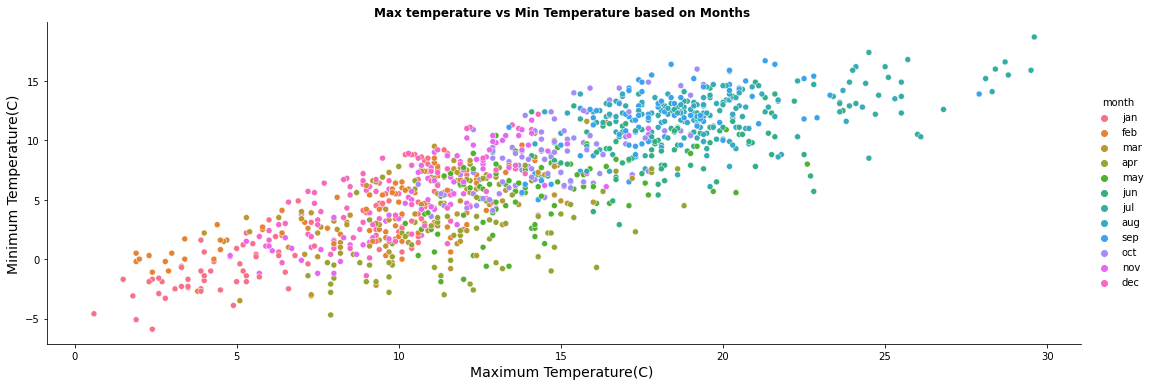

In [256]:
plt.figure(figsize=(25,25))
sns.relplot(x="maxtp", y="mintp", data=weather_data, hue='month',aspect=3)
plt.title("Max temperature vs Min Temperature based on Months ",fontweight='bold')
plt.xlabel('Maximum Temperature(C) ',fontsize=14)
plt.ylabel("Minimum Temperature(C)",fontsize=14)

From the above graph, it is evident that:
 * Months from November to March have the lowest Maximum and Minimum temperatures.
 * The temperatures have an increasing trend from April onwards till August.
 * The min and max temperatures have an almost linear relationship.

***Calculating daily temperature range, and adding this as an additional variable to the DataFrame***

In [102]:
weather_data['Temp_range']=weather_data['maxtp'] - weather_data['mintp']
weather_data.head(5)


,day,month,year,station,maxtp,mintp,rain,wdsp,hg,sun,Temp_range
1,1,jan,2021,Dublin Airport,5.0,-1.9,0.0,8.8,19.0,6.6,6.9
2,2,jan,2021,Dublin Airport,3.5,-2.4,0.1,10.1,19.0,2.4,5.9
3,3,jan,2021,Dublin Airport,3.9,-2.5,4.1,9.2,30.0,0.6,6.4
4,4,jan,2021,Dublin Airport,5.3,2.2,0.5,11.5,27.0,0.6,3.1
5,5,jan,2021,Dublin Airport,5.2,1.2,1.0,9.5,25.0,1.0,4.0


***Plot of daily temperature range versus the hours of sunlight per day, colouring the points based on the weather station***

Text(16.73935763888889, 0.5, 'Sunshine Hours')

<Figure size 1440x1440 with 0 Axes>

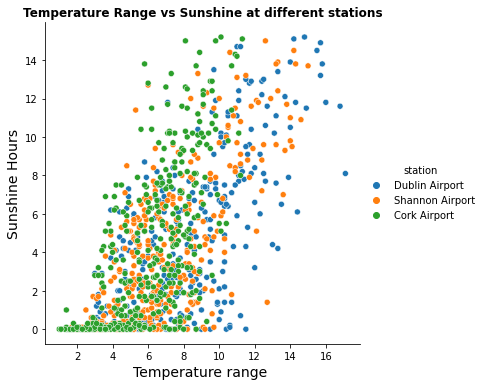

In [143]:
plt.figure(figsize=(20,20))
sns.relplot(x="Temp_range", y="sun", data=weather_data, hue='station')
plt.title("Temperature Range vs Sunshine at different stations",fontweight='bold')
plt.xlabel('Temperature range ',fontsize=14)
plt.ylabel("Sunshine Hours",fontsize=14)

On analysing the above plot, we can see that:
 * The temperature range increases in the order Cork > Shannon > Dublin
 * For Dublin and Shannon; with increase in temperature range, the duration of sunshine tends to increase.
 * However, for Cork, this relationship is weak.
 * We note that for most part, Cork receives the least Sunshine hours

***Comparative analysis of the weather at Dublin Airport, Shannon Airport and Cork Airport***

In [145]:
data_Dublin=weather_data[weather_data['station']=="Dublin Airport"]
data_Shannon=weather_data[weather_data['station']=="Shannon Airport"]
data_Cork=weather_data[weather_data['station']=="Cork Airport"]

In [194]:
data_Dublin[['maxtp','mintp','Temp_range','rain','wdsp','hg','sun']].describe()

,maxtp,mintp,Temp_range,rain,wdsp,hg,sun
count,364.000000,364.000000,364.000000,364.000000,365.000000,364.000000,364.000000
mean,13.590934,6.001099,7.589835,1.828846,8.625753,22.623626,4.089835
std,5.258806,4.748774,3.199411,3.878082,3.456376,7.790196,3.981802
min,1.500000,-5.900000,1.400000,0.000000,2.600000,10.000000,0.000000
25%,10.000000,2.000000,5.200000,0.000000,6.100000,17.000000,0.500000
50%,13.300000,6.200000,7.350000,0.100000,7.900000,21.000000,2.900000
75%,18.100000,9.900000,9.800000,1.325000,10.500000,27.250000,6.800000
max,26.800000,15.800000,17.100000,26.900000,24.400000,50.000000,15.200000


In [195]:
data_Shannon[['maxtp','mintp','Temp_range','rain','wdsp','hg','sun']].describe()

,maxtp,mintp,Temp_range,rain,wdsp,hg,sun
count,364.000000,364.000000,364.000000,365.000000,365.000000,363.000000,364.000000
mean,14.368681,7.611813,6.756868,2.549041,7.815342,21.796143,3.856044
std,5.175728,4.820239,2.834320,4.007511,3.575878,8.372032,3.817264
min,0.600000,-4.600000,1.700000,0.000000,1.900000,8.000000,0.000000
25%,11.100000,4.275000,4.800000,0.000000,5.400000,16.000000,0.400000
50%,14.100000,7.650000,6.300000,0.500000,6.900000,20.000000,2.700000
75%,18.000000,11.525000,8.425000,3.400000,9.700000,26.000000,6.200000
max,29.600000,18.700000,15.000000,20.700000,25.800000,61.000000,15.000000


In [196]:
data_Cork[['maxtp','mintp','Temp_range','rain','wdsp','hg','sun']].describe()

,maxtp,mintp,Temp_range,rain,wdsp,hg,sun
count,365.000000,365.000000,365.000000,362.000000,364.000000,365.000000,365.000000
mean,13.239726,7.236438,6.003288,3.415470,9.321978,24.164384,4.164110
std,4.826949,4.339971,2.342826,6.234737,3.924194,8.843284,4.077572
min,1.900000,-2.700000,1.000000,0.000000,2.400000,7.000000,0.000000
25%,9.900000,3.800000,4.300000,0.000000,6.600000,18.000000,0.200000
50%,12.800000,6.900000,6.200000,0.600000,8.500000,23.000000,3.100000
75%,16.800000,11.100000,7.800000,4.300000,11.200000,29.000000,7.000000
max,25.700000,17.400000,11.300000,50.100000,26.300000,64.000000,15.200000


Text(0.5, 1.0, 'Comparison of Maximum Temperatures accross stations')

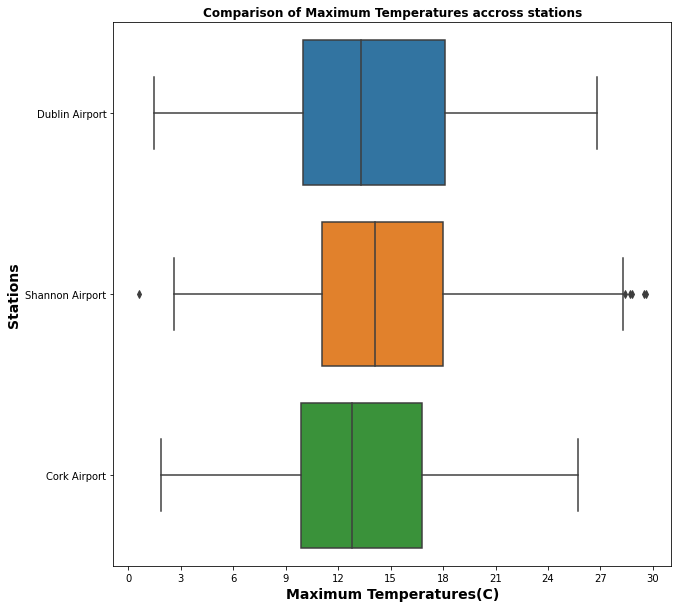

In [217]:
plt.figure(figsize=(10,10))
sns.boxplot(data=weather_data,x="maxtp",y="station")
plt.xticks(np.linspace(0,30,11))
plt.ylabel("Stations",fontweight="bold",fontsize=14)
plt.xlabel("Maximum Temperatures(C)",fontweight="bold",fontsize=14)
plt.title("Comparison of Maximum Temperatures accross stations",fontweight='bold')

Text(0.5, 0, 'Minimum Temperatures(C)')

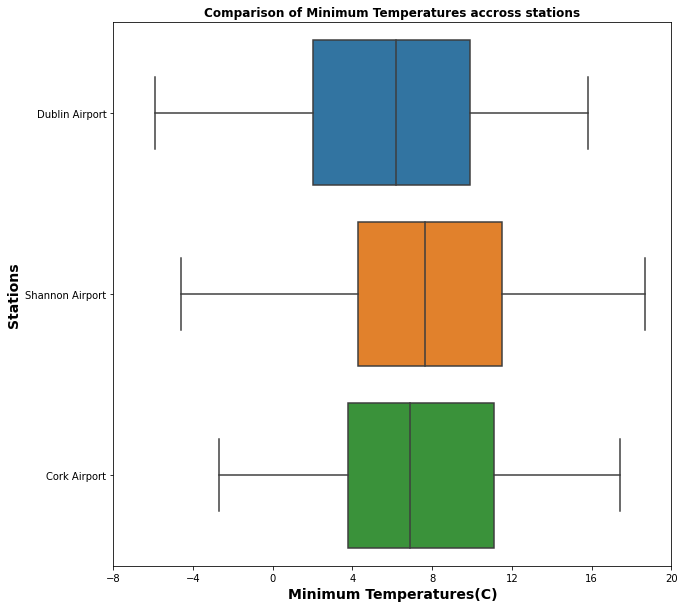

In [218]:
plt.figure(figsize=(10,10))
sns.boxplot(data=weather_data,x="mintp",y="station")
plt.xticks(np.linspace(-8,20,8))
plt.title("Comparison of Minimum Temperatures accross stations",fontweight='bold')
plt.ylabel("Stations",fontweight="bold",fontsize=14)
plt.xlabel("Minimum Temperatures(C)",fontweight="bold",fontsize=14)


Text(0.5, 1.0, 'Comparison of Precipitation accross stations')

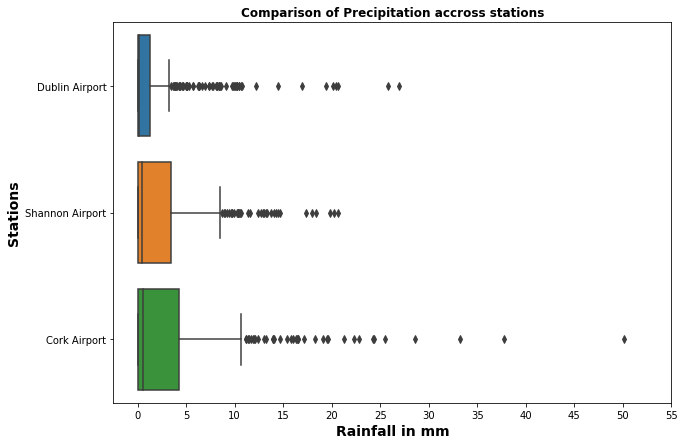

In [225]:
plt.figure(figsize=(10,7))
sns.boxplot(data=weather_data,x="rain",y="station")
plt.xticks(np.linspace(0,55,12))
plt.ylabel("Stations",fontweight="bold",fontsize=14)
plt.xlabel("Rainfall in mm",fontweight="bold",fontsize=14)
plt.title("Comparison of Precipitation accross stations",fontweight='bold')

Text(0.5, 1.0, 'Comparison of Wind Speeds accross stations')

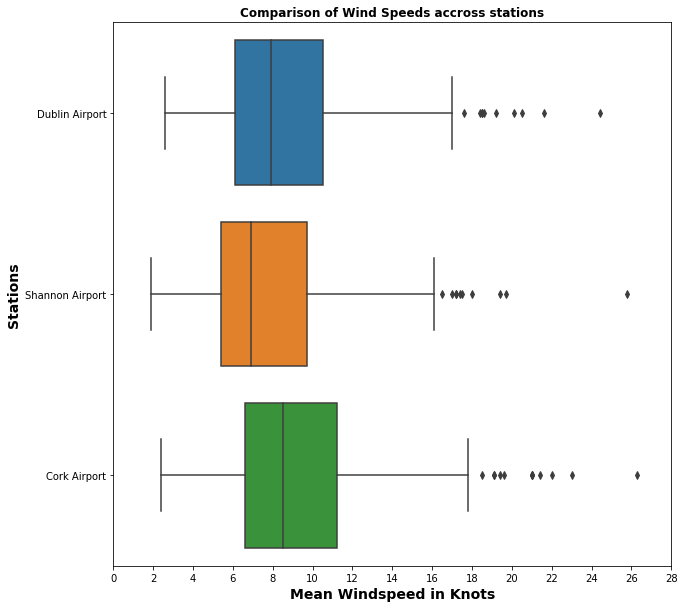

In [227]:
plt.figure(figsize=(10,10))
sns.boxplot(data=weather_data,x="wdsp",y="station")
plt.xticks(np.linspace(0,28,15))
plt.ylabel("Stations",fontweight="bold",fontsize=14)
plt.xlabel("Mean Windspeed in Knots",fontweight="bold",fontsize=14)
plt.title("Comparison of Wind Speeds accross stations",fontweight='bold')

Text(0.5, 1.0, 'Comparison of Highest Gust Speeds across stations')

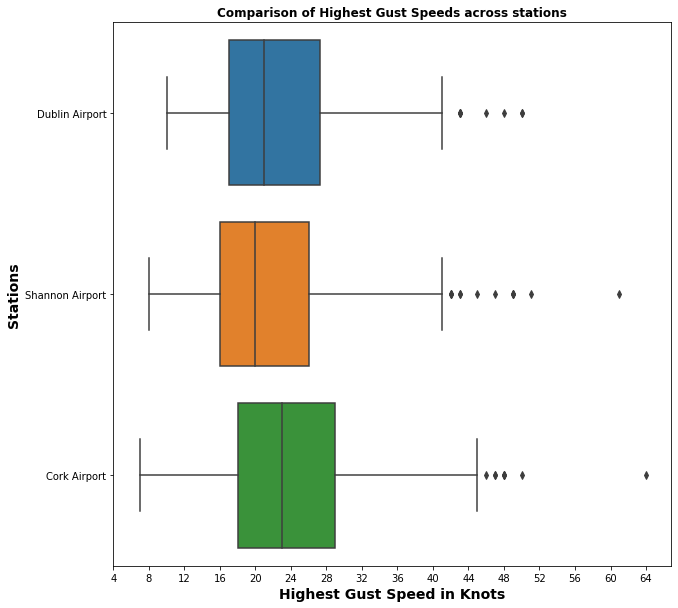

In [233]:
plt.figure(figsize=(10,10))
sns.boxplot(data=weather_data,x="hg",y="station")
plt.xticks(np.linspace(4,64,16))
plt.ylabel("Stations",fontweight="bold",fontsize=14)
plt.xlabel("Highest Gust Speed in Knots",fontweight="bold",fontsize=14)
plt.title("Comparison of Highest Gust Speeds across stations",fontweight='bold')

Text(0.5, 1.0, 'Comparison of Sunshine accross stations')

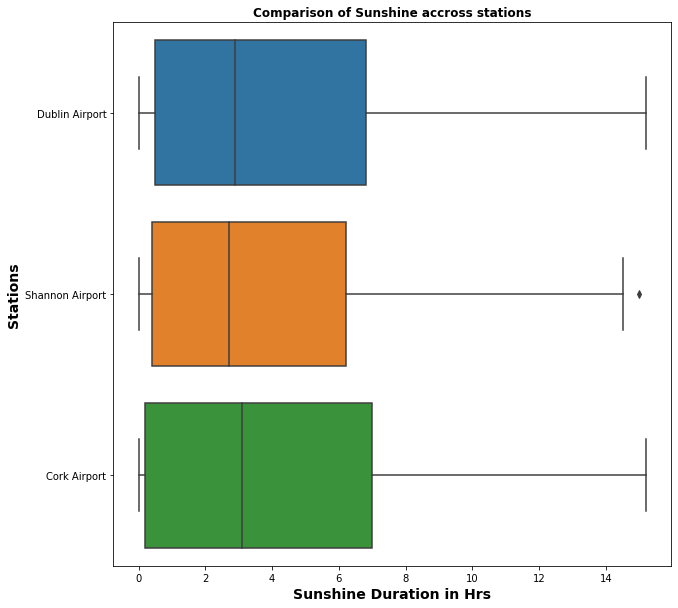

In [235]:
plt.figure(figsize=(10,10))
sns.boxplot(data=weather_data,x="sun",y="station")
plt.ylabel("Stations",fontweight="bold",fontsize=14)
plt.xlabel("Sunshine Duration in Hrs",fontweight="bold",fontsize=14)
plt.title("Comparison of Sunshine accross stations",fontweight='bold')

## Comparison across 3 weather stations

Froms the plots and summary of our data with respect to the different stations, we can conclude that:
 * Shannon Airport recorded the highest median for maximum temperatures and Cork,the lowest.
 * Shannon recorded, both the highest and lowest maximum temperatures.
 * Shannon Airport recorded the highest median for minimum temperatures and Dublin,the lowest.
 * Also, Dublin recorded the lowest temperature across the 3 stations.
 * Cork was the windiest place place with highest mean wind speed as well as the highest recorded gust.
 * Shannon was the least windy place with lowest mean wind speed.
 * The wind and gust data along with precipitation data has considerable outliers.
 * Sunshine duration was almost similar both in terms of medians and means.
 * Cork was the rainiest place in Ireland, while Dublin received the lowest precipitation. 